# CorNN scheme run demo

In [1]:
import pandas as pd
from pprint import pprint
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
from nn_scheme.experimental.blind_scheme import BlindNNScheme

In [3]:
# original data
data = "datasets/breast_cancer_full.csv"
dataset = pd.read_csv(data)
correlated_attributes = ['age', 'menopause', 'inv-nodes', 'node-caps']

# fingerprinting 
scheme = BlindNNScheme(gamma=1, fingerprint_bit_length=16, k=10)
fingerprinted_data, iter_log = scheme.demo_insertion('breast-cancer', primary_key='Id', secret_key=601, recipient_id=4,
                                          correlated_attributes=correlated_attributes)

Start the demo blind insertion algorithm of a scheme for fingerprinting categorical data (neighbourhood) ...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 4: 1110000100111100

Generated fingerprint for buyer 4: 1110000100111100
Inserting the fingerprint...

Training balltrees in: 0.01 sec.
Fingerprint inserted.
Time: 0 sec.


## Iteration 1:
#### Marking position: 
- Marking row: 0
- Marking attribute: "_deg-malig_"
- Original value: 3

In [4]:
# iter_log[0]['row_index'] --> 0
# iter_log[0]['attribute'] --> deg-malig
dataset.iloc[[0]]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events


#### Neighbourhood: 
- Correlated attributes: _age, menopause, inv-nodes, node-caps_
- Neighbourhood size: 22
- Max distance (hamming): 0

In [5]:
dataset.iloc[iter_log[0]['neighbors']]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
22,22,30-39,premeno,25-29,0-2,no,2,right,left_low,no,no-recurrence-events
77,77,30-39,premeno,25-29,0-2,no,1,left,central,no,no-recurrence-events
74,74,30-39,premeno,5-9,0-2,no,2,left,right_low,no,no-recurrence-events
148,148,30-39,premeno,20-24,0-2,no,3,left,central,no,no-recurrence-events
138,138,30-39,premeno,40-44,0-2,no,2,left,left_low,yes,no-recurrence-events
118,118,30-39,premeno,10-14,0-2,no,1,right,left_low,no,no-recurrence-events
35,35,30-39,premeno,30-34,0-2,no,2,left,left_up,no,no-recurrence-events
116,116,30-39,premeno,15-19,0-2,no,1,left,left_low,no,no-recurrence-events
107,107,30-39,premeno,40-44,0-2,no,2,right,right_up,no,no-recurrence-events


- Frequencies in the neighbourhood: 

Text(0.5, 0, "value of 'deg-malig' in the neighbourhood")

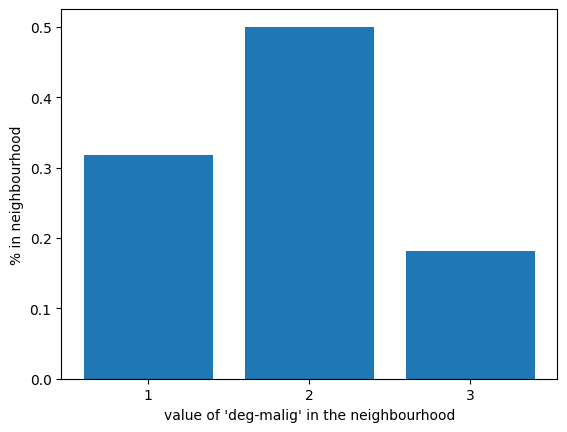

In [6]:
plt.bar(list(iter_log[0]['frequencies'].keys()), list(iter_log[0]['frequencies'].values()), align='center')
plt.xticks(list(iter_log[0]['frequencies'].keys()))
plt.ylabel('% in neighbourhood')
plt.xlabel('value of \'deg-malig\' in the neighbourhood')

#### Marking:
- Mark bit: 0 --> the new value is chosen as a weighted random draw from 2nd to last most represented value in the neighbourhood
- New (fingerprinted) value: '_deg-malig_': 1 

In [7]:
fingerprinted_data.head(1)

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,0,30-39,premeno,30-34,0-2,no,1,left,left_low,no,no-recurrence-events


## Iteration 2:
#### Marking position: 
- Marking row 0, attribute "_age_"

In [8]:
dataset.iloc[[1]]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
1,1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events


#### Neighbourhood: 
- Correlated attributes: _(age), menopause, inv-nodes, node-caps_
- Neighbourhood size: 104
- Max distance (hamming): 0

In [9]:
dataset.iloc[iter_log[1]['neighbors']]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
65,65,40-49,premeno,10-14,0-2,no,1,right,left_up,no,no-recurrence-events
64,64,40-49,premeno,25-29,0-2,no,1,left,right_low,no,no-recurrence-events
77,77,30-39,premeno,25-29,0-2,no,1,left,central,no,no-recurrence-events
78,78,50-59,premeno,25-29,0-2,no,2,left,left_low,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...,...
256,256,40-49,premeno,30-34,0-2,no,1,left,left_low,yes,recurrence-events
281,281,30-39,premeno,30-34,0-2,no,2,left,left_up,no,recurrence-events
269,269,40-49,premeno,25-29,0-2,no,2,left,left_low,yes,recurrence-events
268,268,30-39,premeno,35-39,0-2,no,3,left,left_low,no,recurrence-events


- Frequencies in the neighbourhood:

Text(0.5, 0, "value of 'age' in the neighbourhood")

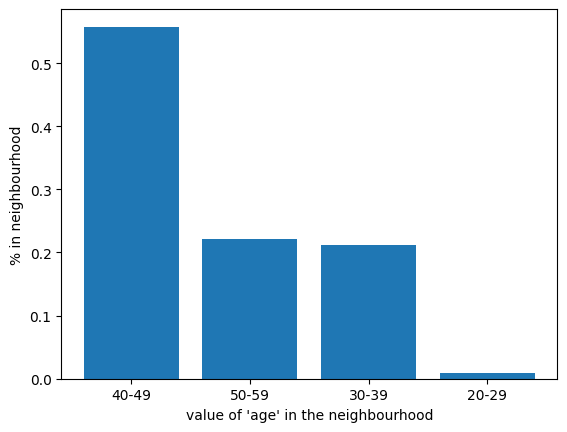

In [10]:
plt.bar(list(iter_log[1]['frequencies'].keys()), list(iter_log[1]['frequencies'].values()), align='center')
plt.xticks(list(iter_log[1]['frequencies'].keys()))
plt.ylabel('% in neighbourhood')
plt.xlabel('value of \'age\' in the neighbourhood')

#### Marking:
- Mark bit: 1 --> the new value is the most frequent value from the neighbourhood
- New (fingerprinted) value: '_age_': 40-49

In [11]:
fingerprinted_data.iloc[[1]]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
1,1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events


## Iteration 3:
#### Marking position: 
- Marking row 2, attribute "_node-caps_"

In [12]:
dataset.iloc[[2]]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
2,2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events


#### Neighbourhood: 
- Correlated attributes: _age, menopause, inv-nodes, (node-caps)_
- Neighbourhood size: 62
- Max distance (hamming): 0

In [13]:
dataset.iloc[iter_log[2]['neighbors']]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
1,1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
60,60,40-49,premeno,20-24,0-2,no,2,left,central,no,no-recurrence-events
4,4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
61,61,40-49,premeno,10-14,0-2,no,1,right,right_low,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...,...
250,250,40-49,premeno,25-29,0-2,no,3,left,left_up,no,recurrence-events
251,251,40-49,premeno,50-54,0-2,no,2,right,left_low,yes,recurrence-events
256,256,40-49,premeno,30-34,0-2,no,1,left,left_low,yes,recurrence-events
272,272,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events


- Frequencies in the neighbourhood:

Text(0.5, 0, "value of 'node-caps' in the neighbourhood")

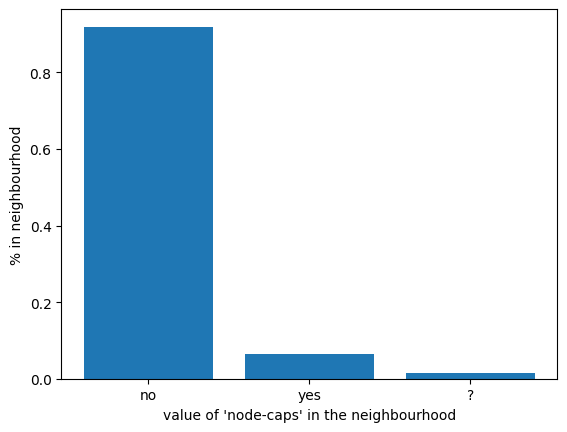

In [14]:
plt.bar(list(iter_log[2]['frequencies'].keys()), list(iter_log[2]['frequencies'].values()), align='center')
plt.xticks(list(iter_log[2]['frequencies'].keys()))
plt.ylabel('% in neighbourhood')
plt.xlabel('value of \'node-caps\' in the neighbourhood')

Note: we consider missing values as another category likely to accur in the dataset. However, this can be handled differently via preprocessing.

#### Marking:
- Mark bit: 0 --> the new value is the most frequent value from the neighbourhood
- New (fingerprinted) value: '_node-caps_': yes

In [15]:
fingerprinted_data.iloc[[2]]

,Id,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
2,2,40-49,premeno,20-24,0-2,yes,2,left,left_low,no,no-recurrence-events
